# Datasets analysis and comparison

The aim of this notebook is to describe the two datasets subjects of our work and to compare them in order to check whether there exists differences between them in the input space.

In [45]:
import pandas as pd
import numpy as np

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
src_dir = '/neurospin/dico/data/deep_folding/current/crops/SC/mask/sulcus_based/2mm/'

### Loading of datasets

#### 1) HCP

In [3]:
hcp = pd.read_pickle(src_dir + 'Rskeleton.pkl')

In [4]:
hcp.head()

,173536,683256,161832,395958,289555,208630,757764,492754,125222,570243,...,179245,158843,194847,150423,885975,700634,213017,138332,146836,123925
0,"[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...",...,"[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]..."


In [12]:
hcp.T.head()

,0
173536,"[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]..."
683256,"[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]..."
161832,"[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]..."
395958,"[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]..."
289555,"[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]..."


#### 2) One-handed

In [6]:
oh = pd.read_pickle(src_dir + 'one_handed_dataset/R_one_handed_skeleton.pkl')

In [7]:
oh.head()

,MA12_struct_nf_cropped_skeleton.nii.gz,MA08_struct_nf_cropped_skeleton.nii.gz,PC08_struct_cropped_skeleton.nii.gz,PC17_struct_cropped_skeleton.nii.gz,MA34_struct_nf_cropped_skeleton.nii.gz,PA02_struct_cropped_skeleton.nii.gz,PA32_struct_cropped_skeleton.nii.gz,PC06_struct_cropped_skeleton.nii.gz,PA19_struct_cropped_skeleton.nii.gz,PC10_struct_cropped_skeleton.nii.gz,...,PC15_struct_cropped_skeleton.nii.gz,PC16_struct_cropped_skeleton.nii.gz,PC24_struct_cropped_skeleton.nii.gz,PA03_struct_cropped_skeleton.nii.gz,PA22_struct_cropped_skeleton.nii.gz,PC01_struct_cropped_skeleton.nii.gz,PA06_struct_cropped_skeleton.nii.gz,PA31_struct_cropped_skeleton.nii.gz,PA10_struct_cropped_skeleton.nii.gz,MA26_struct_nf_cropped_skeleton.nii.gz
0,"[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...",...,"[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]...","[[[[0], [0], [0], [0], [0], [0], [0], [0], [0]..."


## Verifications

In [11]:
assert(hcp['173536'][0].shape==oh['MA12_struct_nf_cropped_skeleton.nii.gz'][0].shape)

#### Projections in a t-SNE space for both datasets

In [41]:
hcp_array = np.array([hcp.T[0][k].flatten() for k in range(len(hcp.T))])
oh_array = np.array([oh.T[0][k].flatten() for k in range(len(oh.T))])
data_array = np.concatenate((hcp_array, oh_array), axis=0)

In [42]:
data_array.shape

(1166, 54405)

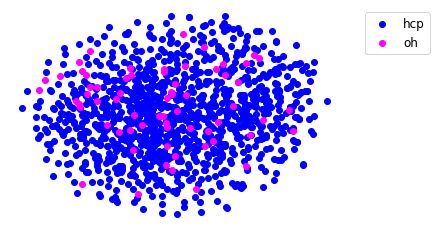

In [48]:
X_embedded = TSNE(n_components=2).fit_transform(data_array)
labels = np.array(['hcp' for k in range(len(hcp_array))] + ['oh' for k in range(len(oh_array))])

color_dict = {'hcp': 'blue', 'oh': 'magenta'}
arr = X_embedded

fig = plt.figure()
ax = fig.add_subplot(111)

for g in np.unique(labels):
    ix = np.where(labels == g)
    x = [arr[ix][k][0] for k in range(len(ix[0]))]
    y = [arr[ix][k][1] for k in range(len(ix[0]))]
    g_lab=g
    ax.scatter(x, y, c = color_dict[g], label = g_lab)


plt.axis('off')    
ax.legend(fontsize=12)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.show()